In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
def hist_eq(channel):
  channel= np.asarray(channel)
  flat = channel.flatten()

  height, width = img.shape[:2]
  num_pixels = np.zeros(256, dtype=int)
  for pixel in flat:
    num_pixels[pixel] += 1

  total_pixels = sum(num_pixels)
  pdf = []
  pdf = num_pixels/total_pixels
  cdf = []
  cdf = [pdf[0]]
  for i in range(1, len(pdf)):
    cdf.append(cdf[i-1] + pdf[i])
  cdf = np.array(cdf)

  n_cdf = cdf*255 #(L-1)=256-1=255
  hel = np.array(n_cdf)
  hel = hel.astype('uint8')
  channel_new = hel[flat]

  channel_normalized = ((channel_new - channel_new.min()) / (channel_new.max() - channel_new.min()) * 255).astype('uint8')

  return channel_normalized

In [ ]:
def hist_plot(b,g,r, titles):
  fig, axes = plt.subplots(1, 3, figsize=(15, 5))
  axes[0].hist(b, bins=256, color='blue', alpha=0.5, histtype='stepfilled')
  axes[0].set_xlim([0, 260])
  axes[0].set_title(titles[0])

  axes[1].hist(g, bins=256, color='green', alpha=0.5, histtype='stepfilled')
  axes[1].set_xlim([0, 260])
  axes[1].set_title(titles[1])

  axes[2].hist(r, bins=256, color='red', alpha=0.5, histtype='stepfilled')
  axes[2].set_xlim([0, 260])
  axes[2].set_title(titles[2])

  plt.tight_layout()
  plt.show()

In [ ]:
path = "/content/sample01_rb.jpg"
img = cv2.imread(path)

In [ ]:
 img.shape

(480, 640, 3)

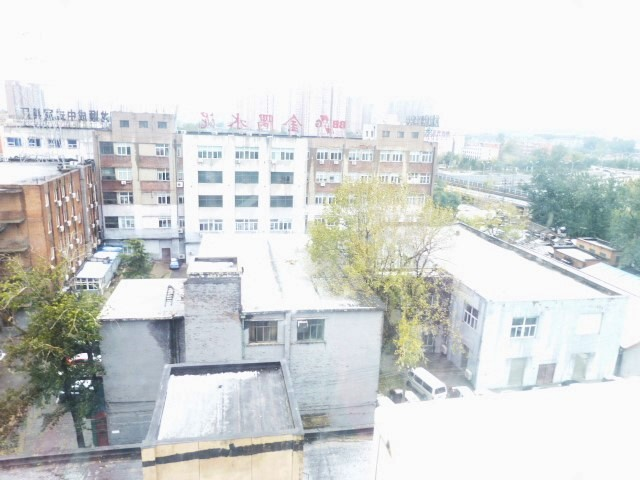

In [ ]:
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Using RGB to Perform Channel Equalization

In [ ]:
img_b, img_g, img_r = cv2.split(img)

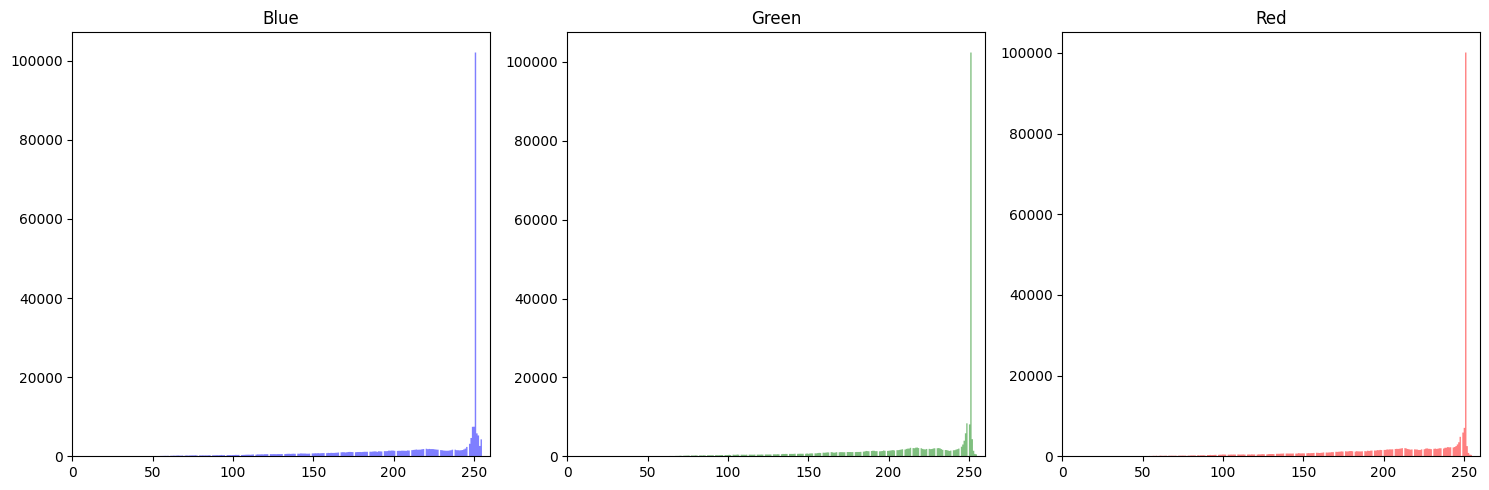

In [ ]:
img_b= np.asarray(img_b)
img_g= np.asarray(img_g)
img_r= np.asarray(img_r)

flat_b = img_b.flatten()
flat_g = img_g.flatten()
flat_r = img_r.flatten()
t = ['Blue','Green','Red']
hist_plot(flat_b, flat_g, flat_r,t)

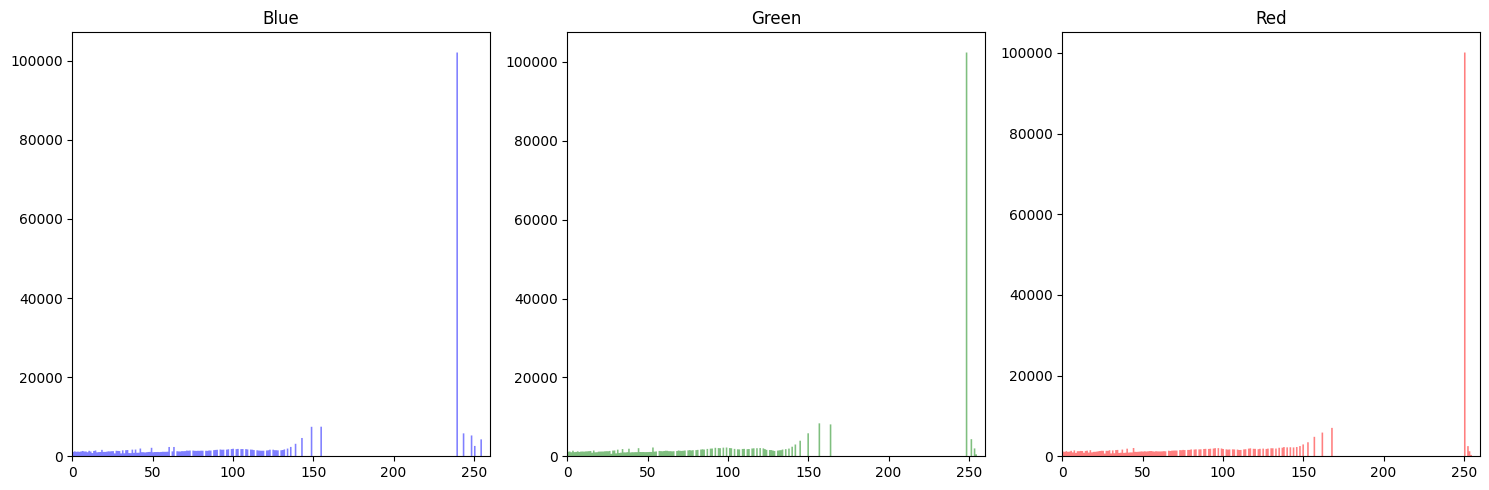

In [ ]:
blue = hist_eq(img_b)
green = hist_eq(img_g)
red = hist_eq(img_r)
hist_plot(blue,green,red,t)

In [ ]:
blue = np.reshape(blue, img_b.shape)
green = np.reshape(green, img_g.shape)
red = np.reshape(red, img_r.shape)
equalized_image = cv2.merge([blue, green, red])

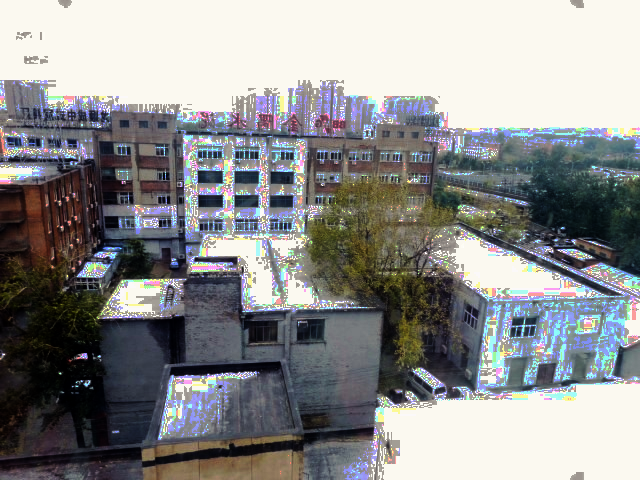

In [ ]:
cv2_imshow(equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Using HSV Based Approach

In [ ]:
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_h, img_s, img_v = cv2.split(hsv_image)

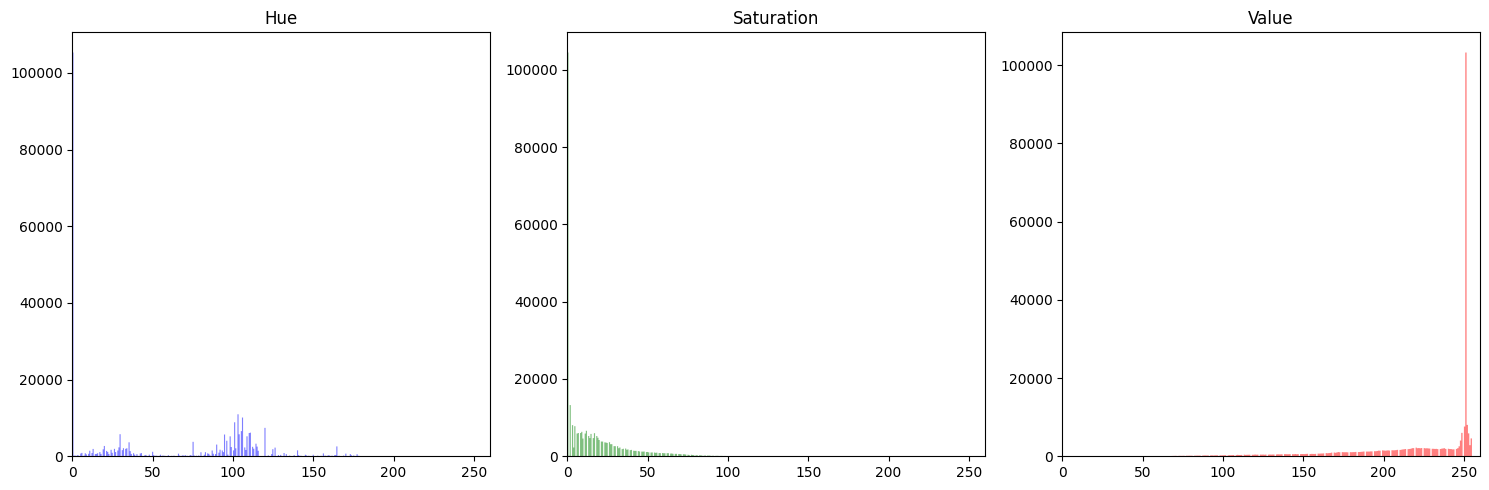

In [ ]:
img_h= np.asarray(img_h)
img_s= np.asarray(img_s)
img_v= np.asarray(img_v)

flat_h = img_h.flatten()
flat_s = img_s.flatten()
flat_v = img_v.flatten()
titles = ['Hue','Saturation','Value']
hist_plot(flat_h, flat_s, flat_v, titles)

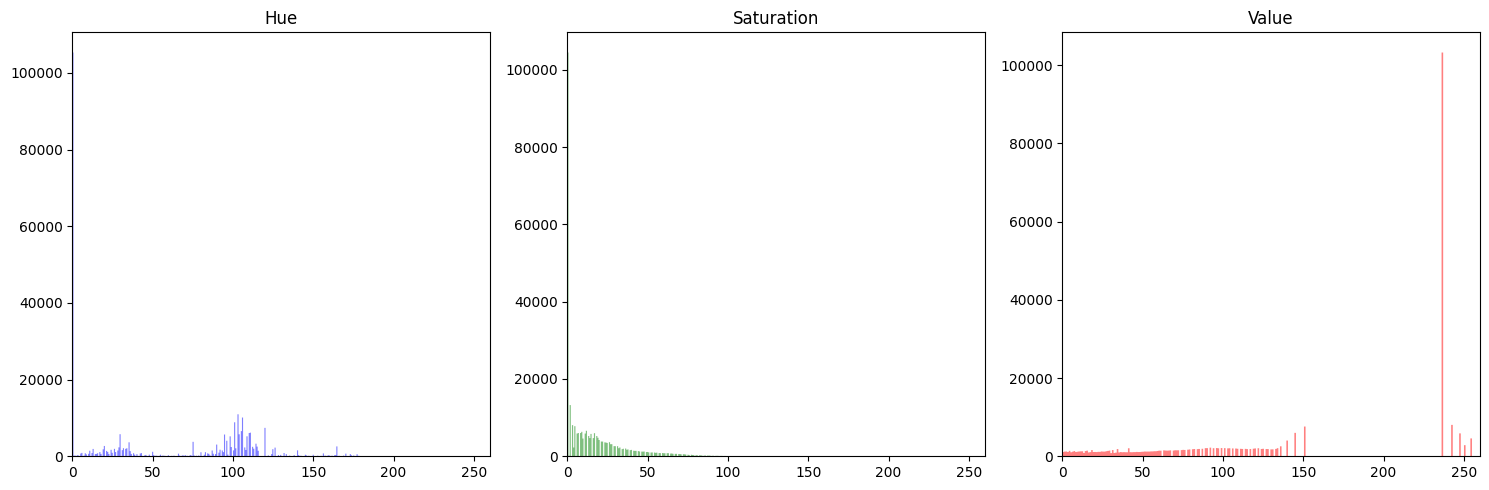

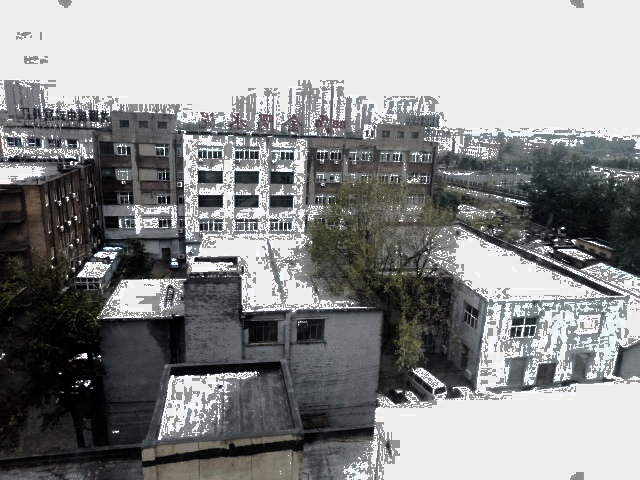

-1

In [ ]:
value = hist_eq(img_v)
hist_plot(flat_h,flat_s,value,titles)
value = np.reshape(value, img_v.shape)
equalized_image_hsv = cv2.merge([img_h, img_s, value])
bgr_image = cv2.cvtColor(equalized_image_hsv, cv2.COLOR_HSV2BGR)
cv2_imshow(bgr_image)
cv2.waitKey(0)

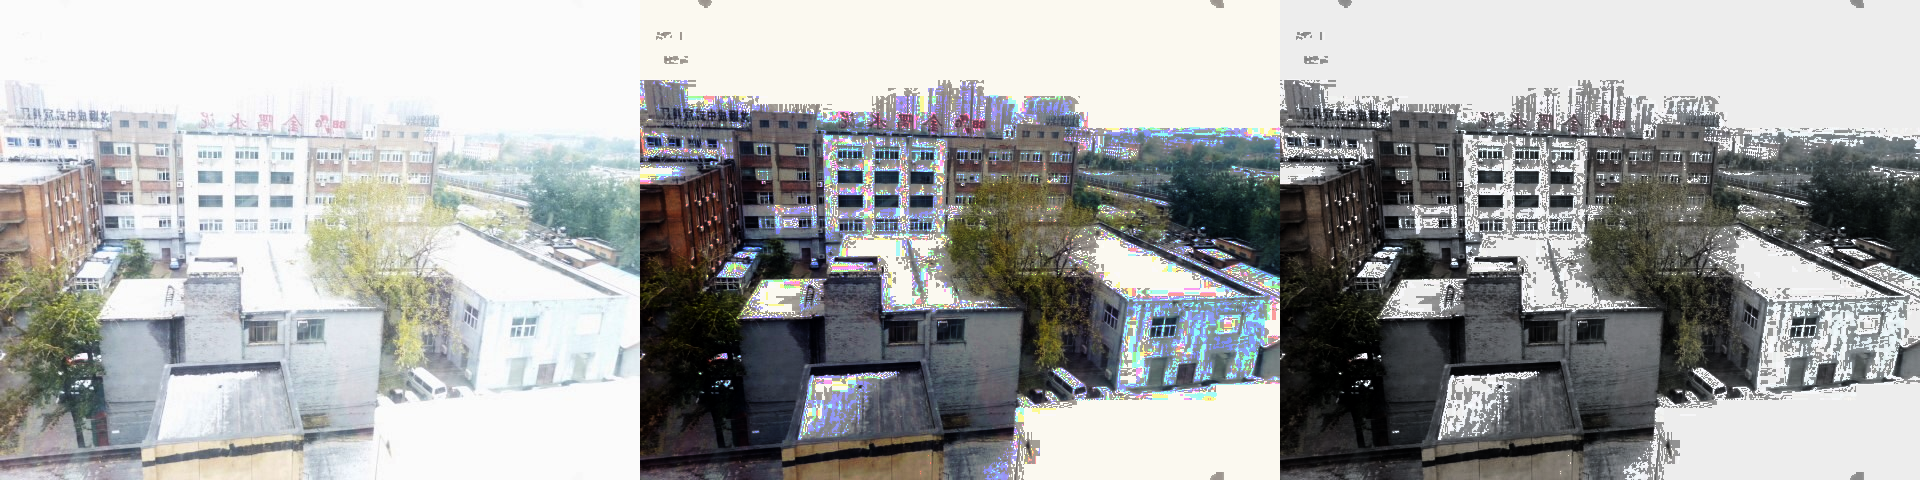

In [ ]:
if img.shape[0] == equalized_image.shape[0] == bgr_image.shape[0]:
    # Concatenate the images horizontally
    concatenated_image = cv2.hconcat([img, equalized_image, bgr_image])

    # Display the concatenated image
    cv2_imshow(concatenated_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Images have different heights. They should have the same height to concatenate horizontally.")

___